### 문제 1)

- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

In [40]:
import math
from scipy.stats import t      

# 주어진 요약 통계량
mu_0 = 500             # 귀무가설의 모평균
sample_mean = 495
sample_std  = 10
n = 25

alpha = 0.05

# t-통계량과 자유도
t_statistic = (sample_mean - mu_0) / (sample_std / math.sqrt(n))
ddof = n-1

# 양측 검정 p-value
p_value = 2 * t.sf(abs(t_statistic), ddof)

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. "
          f"유의수준 {alpha}에서 귀무가설을 기각합니다. "
          "빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. "
          f"유의수준 {alpha}에서 귀무가설을 채택합니다. "
          "빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")


t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


### 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

 Hint)

- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 색칠하기

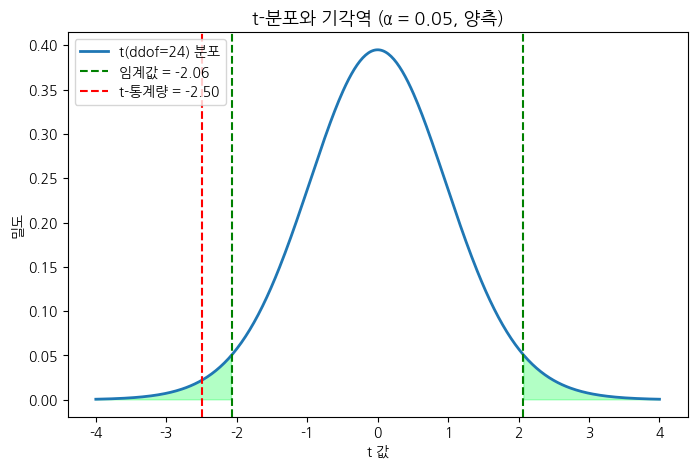

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t    

from matplotlib import font_manager, rcParams

# 전역 기본 글꼴 지정 (한글 깨짐 방지)
rcParams['font.family'] = 'NanumGothic'      

# 마이너스 기호 깨짐 방지
rcParams['axes.unicode_minus'] = False

# 주어진 통계량
mu_0 = 500   
sample_mean = 495
sample_std  = 10
n = 25
alpha = 0.05

# t-통계량과 임계값 계산 
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))
ddof = n-1
crit = t.ppf(1 - alpha/2, ddof)   # 양측 검정 → ±crit

# t-분포 PDF 곡선 데이터 
x = np.linspace(-4, 4, 400)
pdf = t.pdf(x, ddof)

# 시각화 
fig, ax = plt.subplots(figsize=(8, 5))

# t-분포 곡선
ax.plot(x, pdf, lw=2, label=f"t(ddof={ddof}) 분포")

# 기각역 색칠 (민트)
ax.fill_between(x, 0, pdf, where=(x <= -crit) | (x >= crit),
                color="#00FF40", alpha=0.3)

# 임계값 선 (초록 점선)
ax.axvline(-crit, color="green", linestyle="--",
           label=f"임계값 = {(-crit):.2f}") # -crit
ax.axvline(crit, color="green", linestyle="--") # +crit

# 관측된 t-통계량 선 (빨간 점선)
ax.axvline(t_statistic, color="red", linestyle="--",
           label=f"t-통계량 = {t_statistic:.2f}")

# 5) 레이블·제목·범례
ax.set_title("t-분포와 기각역 (α = 0.05, 양측)", fontsize=13)
ax.set_xlabel("t 값")
ax.set_ylabel("밀도")
ax.legend(loc="upper left")

plt.show()


### 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

In [42]:
import math
from scipy.stats import t                 

sample_scores = [79, 77, 80, 76, 78, 81, 75, 79,
                 77, 80, 78, 76, 82, 77, 79, 78]

# 가설 설정
mu_0 = 75         # 교육 전 평균
alpha = 0.05       

# t-통계량과 p-값 계산 
n = len(sample_scores)
sample_mean = sum(sample_scores) / n
sample_std  = math.sqrt(sum((x - sample_mean)**2 for x in sample_scores) / (n - 1))

t_stat = (sample_mean - mu_0) / (sample_std / math.sqrt(n))   # t-통계량
p_value = t.sf(t_stat, df=n-1)         # 단측 검정 p-값 (우측 꼬리)

# 결과 출력 
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. "
          f"유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. "
          f"유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다.")


t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

In [43]:
import numpy as np
from scipy import stats

group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

alpha = 0.05          

# 등분산 검정

lev_stat, lev_p = stats.levene(group_A, group_B, center='mean')

# 분산 동질성 여부 판정
if lev_p >= alpha:
    equal_var = True   # 귀무가설 유지 → 두 집단 분산이 같다고 본다
else:
    equal_var = False  # 귀무가설 기각 → 두 집단 분산이 다르다고 본다


# 등분산 판정 결과
if equal_var:
    print(f"[Levene]  통계량 = {lev_stat:.4f},  p-value = {lev_p:.4f} → 등분산 가정 채택\n")
else:
    print(f"[Levene]  통계량 = {lev_stat:.4f},  p-value = {lev_p:.4f} → 등분산 가정 기각\n")



# 독립 표본 t-검정 

t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=equal_var)

#  결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. "
          f"유의수준 {alpha}에서 귀무가설을 기각합니다. "
          "다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. "
          f"유의수준 {alpha}에서 귀무가설을 채택합니다. "
          "다이어트 프로그램은 효과가 없습니다.")


[Levene]  통계량 = 2.5845,  p-value = 0.1236 → 등분산 가정 채택

t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


문제 5) 대응표본 t검정
- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

In [44]:
import numpy as np
from scipy.stats import ttest_rel

# 운동 전/후 체중(kg)
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after  = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

alpha = 0.05

# 대응표본 t-검정(양측)
t_stat, p_value = ttest_rel(before, after)

# 결과 해석
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. "
          f"유의수준 {alpha}에서 귀무가설을 기각합니다. "
          "운동 프로그램은 체중 감소에 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. "
          f"유의수준 {alpha}에서 귀무가설을 채택합니다. "
          "운동 프로그램은 체중 감소에 효과가 없습니다.")


t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 운동 프로그램은 체중 감소에 효과가 있습니다.


등분산 검정이 필요 없는 이유:    
- 대응표본 t-검정은 각 참가자별 “전 – 후 차이”만을 다루므로 분석 단위가 이미 하나의 변수(차이)가 된다

- 따라서 두 집단의 분산이 같은지(Levene, F-test 등)를 확인할 필요가 없고, ttest_rel 함수에도 equal_var 인자가 존재하지 않는다. (공식 문서 참조)

- 즉, paired t-test에서는 등분산 가정을 고려하지 않아도 된다.

#### 문제 6~8을 위한 Online Retail II 데이터 불러오기

In [45]:
import pandas as pd

# 파일 읽기
excel_file = pd.ExcelFile('../data/통계 MQ1/online_retail_II.xlsx')

# 각각의 시트 읽기
df1 = pd.read_excel(excel_file, sheet_name='Year 2009-2010') # 첫 번째 시트
df2 = pd.read_excel(excel_file, sheet_name='Year 2010-2011') # 두 번째 시트

# 데이터 합치기
df = pd.concat([df1, df2], ignore_index=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [46]:
# Customer ID에 결측치가 있는 행을 제거
df = df.dropna(subset=['Customer ID'])

# 결측치 0개인지 확인
df.isna().sum()

# 오늘은 중복값이 통계량에 영향을 미칠 수도 있으므로 제거
df = df.drop_duplicates()

In [47]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


문제 6) 표본 추출
- Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.

In [48]:
import numpy as np
import pandas as pd

# 영국 데이터만 추출
df_UK = df[df["Country"] == "United Kingdom"].copy()

# 거래별 총 구매금액(TotalPrice) 계산
df_UK["TotalPrice"] = df_UK["Quantity"] * df_UK["Price"]

# 모집단(=df_UK 전체) 평균
pop_mean = df_UK["TotalPrice"].mean()

# 각 표본 크기로 한 번씩 샘플링 -> 평균 계산
sample_sizes = [30, 100, 300]
sample_means = {}

for n in sample_sizes:
    sample = df_UK.sample(n=n, random_state=42)      # 재현성을 위해 random_state 고정
    sample_means[n] = sample["TotalPrice"].mean()

print(f"모집단 평균: {pop_mean:,.2f} £")

for n, m in sample_means.items():
    diff = m - pop_mean
    print(f"표본 {n:>3d}개 평균: {m:>10,.2f} £  (모집단 − 표본 = {diff:>10,.2f} £)")


모집단 평균: 18.83 £
표본  30개 평균:      18.75 £  (모집단 − 표본 =      -0.08 £)
표본 100개 평균:      17.36 £  (모집단 − 표본 =      -1.46 £)
표본 300개 평균:      18.93 £  (모집단 − 표본 =       0.10 £)


#### 결론
- 원래는 30 -> 100 -> 300으로 갈수록 모평균과 비슷해지는 결과를 기대하였으나 샘플을 랜덤하게 추출했기 때문에 의도한대로 도출되지는 않았다. 
- 이 부분을 보완하려면 30보다 큰 범위의 n을 재설정하거나 
- 여러번 부트스트랩을 해봐야 할 거 같다.
- 지금은 문제에서 30, 100, 300을 요구하셨기 때문에 이 결과로 결론을 짓도록 하겠다

### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30, 100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

모집단 평균(df_UK) = 18.83 £

n = 30   표본평균 =    18.75  95% CI=(   11.94,    25.56) 폭 =   13.62
n = 100  표본평균 =    17.36  95% CI=(   12.07,    22.66) 폭 =   10.60
n = 300  표본평균 =    18.93  95% CI=(   14.90,    22.95) 폭 =    8.05


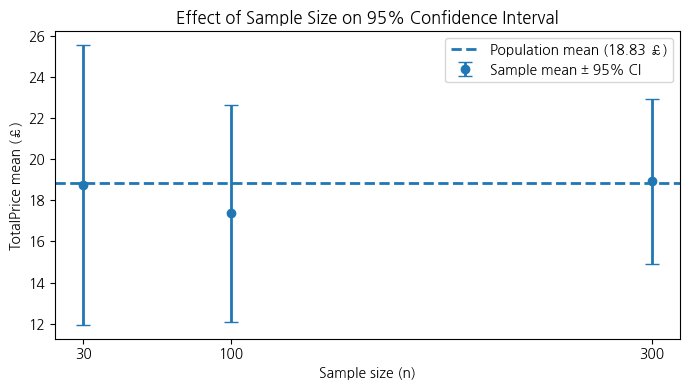

In [49]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt



# 모집단 평균
pop_mean = df_UK["TotalPrice"].mean()
print(f"모집단 평균(df_UK) = {pop_mean:.2f} £\n")

# 함수 정의 
def ci_mean(data, confidence=0.95):
    # 표본 평균과 (1-α) 신뢰구간 반환
    m = data.mean()
    se = stats.sem(data)
    low, high = stats.t.interval(confidence, len(data)-1, loc=m, scale=se)
    return m, low, high

# 표본 추출 + 신뢰구간 계산
sample_sizes = [30, 100, 300]
means, lows, highs = [], [], []

for n in sample_sizes:
    sample = df_UK["TotalPrice"].sample(n=n, random_state=42)
    m, low, high = ci_mean(sample)
    means.append(m); lows.append(low); highs.append(high)
    
    print(f"n = {n:<3d}  표본평균 = {m:>8.2f}  95% CI=({low:>8.2f}, {high:>8.2f})"
          f" 폭 = {high-low:>7.2f}")

# 시각화 
fig, ax = plt.subplots(figsize=(7, 4))

# errorbar: yerr 에는 [하단편차, 상단편차]
errors = [(m - lo, hi - m) for m, lo, hi in zip(means, lows, highs)]
err_lo, err_hi = zip(*errors)
ax.errorbar(sample_sizes, means, yerr=[err_lo, err_hi],
            fmt='o', capsize=5, linewidth=2, label="Sample mean ± 95% CI")

# 모집단 평균 기준선
ax.axhline(pop_mean, linestyle='--', linewidth=2,
           label=f'Population mean ({pop_mean:.2f} £)')

# 레이블 스타일
ax.set_xticks(sample_sizes)
ax.set_xlabel('Sample size (n)')
ax.set_ylabel('TotalPrice mean (£)')
ax.set_title('Effect of Sample Size on 95% Confidence Interval')
ax.legend()
plt.tight_layout()
plt.show()



#### 결론
-  표본의 크기가 커질수록 신뢰구간의 폭이 좁아진다. 

### 문제 8 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

In [50]:
import scipy.stats as stats

df["TotalPrice"] = df["Quantity"] * df["Price"]
# 국가별 데이터 분리
uk_total = df[df["Country"] == "United Kingdom"]["TotalPrice"]
de_total = df[df["Country"] == "Germany"]["TotalPrice"]

# 음수 제거 (실제로는 환불도 포함되므로 음수 제거 가능)
uk_total = uk_total[uk_total > 0]
de_total = de_total[de_total > 0]

# 등분산 가정 하에 독립표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(uk_total, de_total, equal_var=True)

# 결과 출력
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.\n")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.\n")


t-statistic: -2.8680, p-value: 0.0041
영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.



# 2. A/B 테스트

문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.

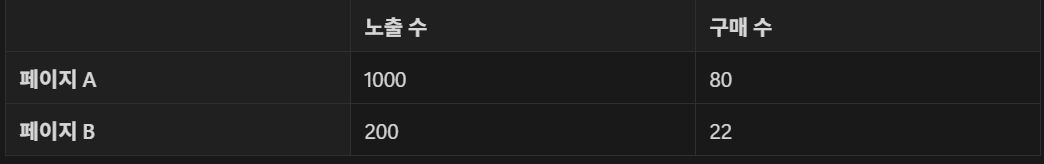

## **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

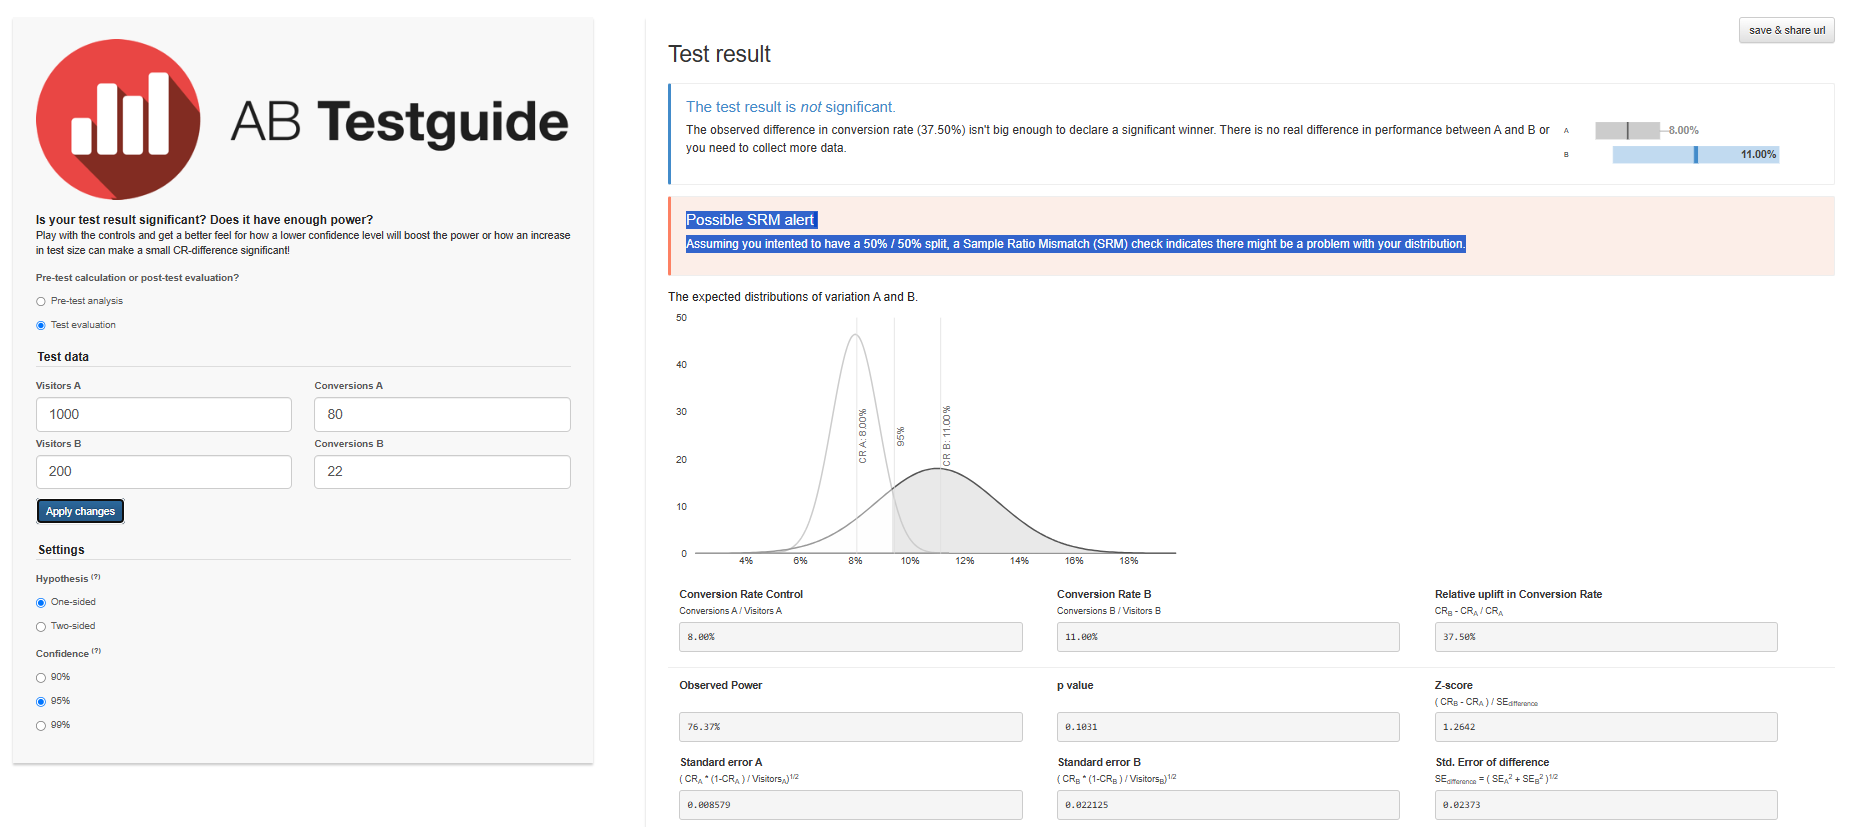


#### 테스트 결과 요약
1. 전환율 차이:  
   - 페이지 A: 8.00%
   - 페이지 B: 11.00% → 페이지 B가 페이지 A보다 3%p 더 높음
2. 통계적 유의성:  
   - 유의하지 않음 → 우연일 가능성을 배제할 수 없음
3. SRM 경고 발생:  
   - A/B 그룹 분배가 50:50이 아님  → 실험 신뢰도 낮음

---


##### 최종 분석:
- 전환율 차이는 존재하나 통계적으로 유의하지 않음
- SRM이 발생했기 때문에 실험 설계 자체에 문제가 있었을 수 있음
- 따라서, 현재 데이터는 페이지 B의 효과를 확실하게 증명하지 못함

---

#### 기획자가 내려야 하는 결론

페이지 B가 A보다 좋아 보이지만, 지금 이 실험 결과만으로 B가 더 효과적이라고 결론 내릴 수는 없다.

#### 기획자가 취해야 할 차후 방안

- 실험을 재설계하고 SRM 없는 조건에서 다시 수행해야 함
- 실험 대상 분포가 정확히 50:50으로 분배되도록 조정
- 위 과정을 실행한 후 재실험 후에도 B가 일관되게 더 높은 전환율을 보인다면 그때 도입 고려

---



## **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.

### 예시 사례: 전환율 증가가 0.1%p인 경우 (위의 페이지 A,B를 기준하여 설명)

- 페이지 A 전환율: 10.00%
- 페이지 B 전환율: **10.10%**
- 샘플 수가 매우 커서 p-value는 0.001 → 통계적으로 **유의함**
- 하지만 전환율 차이는 **0.10%p**, 즉 **실제 수익 증대 효과는 거의 없음**

---

### 의사결정 시 고려할 요소들

| 고려 항목 | 설명 |
| --- | --- |
| **운영 비용** | 페이지 B을 적용하는 데 개발·운영 비용이 들 경우, 페이지 B를 개발 시의 기회비용이 페이지 B를 적용함으로써 얻는 마진(margin)보다 클 수 있음 |
| **유지보수 리스크** | 효과는 있긴 하지만 미진한 개선상태를 보이고, 코드나 UI가 복잡해진다면 비즈니스적인 측면에서 장기적으로 불리할 수 있음 |

---

### 결론
페이지 B 전환율을 0.1% 올렸지만 UI가 복잡해지고 유지비가 더 든다면, 통계적으로 유의하더라도 B는 도입하지 않기로 결정할 수 있음. 대신 페이지 A을 유지하거나, 페이지 B를 대신할 새로운 성능 개선 페이지를 기획해야 함


## 회고

잘한 점: 아침부터 부지런하게 준비한 덕분에 여유있게 끝낼 수 있었다.     
아쉬운 점: 비즈니스적인 사고력이 아직은 부족해서 9, 10번 문제의 경우 상당히 많은 시간이 걸렸고 맞게 생각한 사고인지도 사실 확신이 서지 않는다.    
개선할 점: 이 과정을 하면서나 아니면 이 과정이 끝난 후에 약간 경영학적인 책을 좀 많이 볼 필요가 있을거 같다.